<a href="https://colab.research.google.com/github/diegulio/Dphi_Bootcamp/blob/master/DS4_totaldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
concrete_data =  pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/training_set_label.csv" )

In [69]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


In [70]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              772 non-null    float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  772 non-null    float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             772 non-null    float64
 3   Water  (component 4)(kg in a m^3 mixture)              772 non-null    float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    772 non-null    float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   772 non-null    float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      772 non-null    float64
 7   Age (day)                                              772 non-null    int64  
 8   Concrete compressive strength(MPa, megapascals)    

In [71]:
concrete_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,280.722565,76.496140,52.701347,182.361593,6.000848,971.558782,771.618355,44.993523,35.724196
std,104.711803,87.477423,63.596763,20.913641,5.844002,77.078828,79.785875,60.442735,16.797389
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,166.677500,0.000000,932.000000,724.300000,12.250000,23.677591
50%,275.000000,24.000000,0.000000,185.700000,6.050000,968.000000,777.800000,28.000000,33.870853
75%,350.000000,144.775000,118.187500,193.000000,10.025000,1028.100000,821.000000,56.000000,46.232813
max,540.000000,359.400000,200.100000,237.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


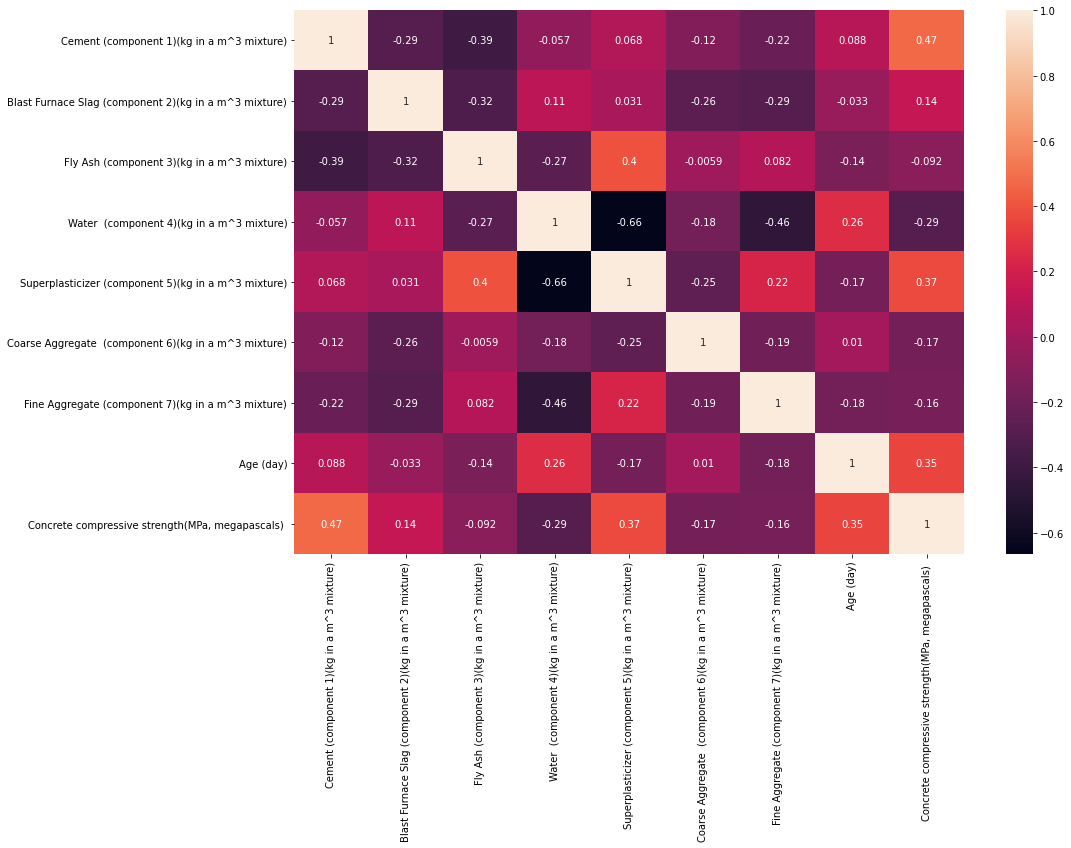

In [72]:
plt.figure(figsize = (15, 10))
sns.heatmap(concrete_data.corr(), annot = True)
plt.show()

In [73]:
features = concrete_data.columns.tolist()
target_name = features.pop()

In [74]:
X = concrete_data[features]
y = concrete_data[target_name]

Estandarizando

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_st = scaler.transform(X)
X = pd.DataFrame(X_st, columns=features)
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,0.167018,-0.875034,0.854349,1.308052,0.873110,-1.193822,-0.343872,-0.281333
1,1.111172,-0.875034,-0.829217,0.174086,-1.027505,0.888514,-0.471797,-0.281333
2,-0.280499,-0.875034,1.031675,0.291310,0.059784,0.737921,-0.174183,0.182216
3,0.222444,0.726416,-0.829217,1.513793,-0.000145,-0.993897,-0.622297,-0.281333
4,0.155551,-0.875034,-0.829217,0.174086,-1.027505,0.888514,-0.471797,-0.628995
...,...,...,...,...,...,...,...,...
767,-0.269701,-0.875034,-0.829217,0.159732,-1.027505,1.818035,0.159049,-0.628995
768,-0.302192,-0.875034,0.724542,-1.160358,1.164195,0.210327,1.472288,0.182216
769,-0.245810,-0.875034,-0.829217,0.461166,-1.027505,-1.061404,2.174496,-0.695216
770,-0.860466,-0.875034,1.143860,-0.967536,0.302926,1.537621,0.406245,0.910649


XGBoost

In [76]:
import xgboost as xgb

In [77]:
params = {'colsample_bytree': 0.8,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 5,
 'min_child_weight': 7,
 'objective': 'reg:squarederror',
 'subsample': 0.9}
 
dtotal_data = xgb.DMatrix(X, label = y)

In [78]:
num_boost_round = 999
xgb_model = xgb.train(
    params,
    dtotal_data,
    num_boost_round=num_boost_round
)


In [79]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, best_model.predict(dtotal_data)))

1.3536978644122233

In [80]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')
test_data_standarized = scaler.transform(test_data)
testdf_standarized = pd.DataFrame(test_data_standarized, columns=features)
dtest = xgb.DMatrix(testdf_standarized)
testdf_standarized





,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,-1.086757,1.264046,2.238965,0.126239,0.171081,-0.954951,-1.700881,-0.281333
1,-1.263547,0.719553,0.879524,0.494658,0.016977,-1.027651,0.105120,-0.281333
2,-1.203343,-0.875034,1.417636,0.523366,0.530657,-1.224979,1.205025,-0.281333
3,-0.427378,-0.875034,-0.829217,0.509012,-1.027505,-0.046201,1.421995,5.297807
4,-1.068791,-0.392082,1.125765,-1.149832,0.826879,1.418185,0.307668,-0.513107
...,...,...,...,...,...,...,...,...
253,-0.597192,-0.250011,1.118370,-1.990977,1.011804,1.351976,0.264023,0.910649
254,1.378746,0.340924,-0.829217,-1.380931,1.797734,-1.550831,1.448333,-0.281333
255,0.558823,-0.875034,-0.829217,0.159732,-1.027505,1.267592,-0.217201,-0.628995
256,0.079101,-0.875034,-0.829217,0.461166,-1.027505,-0.757622,1.551175,0.745096


In [81]:
target = xgb_model.predict(dtest)
target

array([32.90837  , 24.133926 , 11.039334 , 26.733257 , 23.09348  ,
       50.264313 , 20.04474  , 46.347687 , 45.87858  , 47.648754 ,
       20.39769  , 70.79049  , 48.34348  , 15.539961 , 19.910946 ,
       28.898176 , 13.465535 , 29.724052 , 41.41042  , 25.789255 ,
       25.169695 , 32.752613 , 61.19104  , 29.600607 , 38.279892 ,
       79.77321  , 55.558613 , 41.03377  , 41.126175 , 75.10793  ,
       39.10333  , 42.634125 , 42.29107  , 30.928968 , 21.377258 ,
       37.95858  , 40.47205  , 18.794605 , 20.692543 , 37.805103 ,
       70.54988  , 50.114082 , 18.579462 , 22.547138 , 31.22991  ,
       32.743023 , 65.352295 , 41.331936 , 35.7478   , 33.498745 ,
       60.922573 , 30.246616 , 35.06208  , 43.163788 , 15.478159 ,
       24.523232 , 41.467323 , 37.645164 , 27.516417 ,  9.53219  ,
       32.372887 , 23.720905 , 38.13306  , 27.285389 , 55.051006 ,
       23.824818 , 45.94345  , 52.910892 , 28.545137 , 12.65854  ,
        4.946012 , 18.07614  , 18.809574 , 40.9945   , 30.7148

In [82]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = testdf_standarized.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]



In [83]:
target

array([32.90837  , 24.133926 , 11.039334 , 26.733257 , 23.09348  ,
       50.264313 , 20.04474  , 46.347687 , 45.87858  , 47.648754 ,
       20.39769  , 70.79049  , 48.34348  , 15.539961 , 19.910946 ,
       28.898176 , 13.465535 , 29.724052 , 41.41042  , 25.789255 ,
       25.169695 , 32.752613 , 61.19104  , 29.600607 , 38.279892 ,
       79.77321  , 55.558613 , 41.03377  , 41.126175 , 75.10793  ,
       39.10333  , 42.634125 , 42.29107  , 30.928968 , 21.377258 ,
       37.95858  , 40.47205  , 18.794605 , 20.692543 , 37.805103 ,
       70.54988  , 50.114082 , 18.579462 , 22.547138 , 31.22991  ,
       32.743023 , 65.352295 , 41.331936 , 35.7478   , 33.498745 ,
       60.922573 , 30.246616 , 35.06208  , 43.163788 , 15.478159 ,
       24.523232 , 41.467323 , 37.645164 , 27.516417 ,  9.53219  ,
       32.372887 , 23.720905 , 38.13306  , 27.285389 , 55.051006 ,
       23.824818 , 45.94345  , 52.910892 , 28.545137 , 12.65854  ,
        4.946012 , 18.07614  , 18.809574 , 40.9945   , 30.7148

In [84]:
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_DS4.csv')         
files.download('prediction_results_DS4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBOOST: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

NN

In [85]:
params

{'colsample_bytree': 0.8,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 5,
 'min_child_weight': 7,
 'objective': 'reg:squarederror',
 'subsample': 0.9}